In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
y = pd.DataFrame(iris['target'], columns=['target'])
data = pd.concat([x,y], axis=1)

In [3]:
data = data[['sepal length (cm)', 'petal length (cm)', 'target']]
data = data[data['target'].isin([0,1])]

In [4]:
data

,sepal length (cm),petal length (cm),target
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
95,5.7,4.2,1
96,5.7,4.2,1
97,6.2,4.3,1
98,5.1,3.0,1


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train,X_test,y_train,y_test = train_test_split(data[['sepal length (cm)','petal length (cm)']], data[['target']], test_size=0.3, random_state=0)
                                                     #測試, 答案, 30%, 亂數=0

In [7]:
from sklearn.preprocessing import StandardScaler

In [9]:
sc = StandardScaler()
sc.fit(X_train) #算均值與方差
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [10]:
from sklearn.linear_model import LogisticRegression

In [14]:
y_train['target'].values

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0])

In [11]:
lr = LogisticRegression()
lr.fit(X_train_std, y_train['target'].values)

LogisticRegression()

In [12]:
lr.predict(X_test_std) #預測結果

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [13]:
y_test['target'].values #答案

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1])

In [15]:
error = 0  #檢查預測有無錯誤
for i,v in enumerate(lr.predict(X_test_std)):
    if v != y_test['target'].values[i]:
        error += 1

In [16]:
error

0

In [18]:
from IPython.display import Math
Math(r'z=w^Tx') #LogisticRegression x軸

<IPython.core.display.Math object>

In [19]:
Math(r'\phi{(z)}=\frac{1}{1+e^{-z}}') #LogisticRegression y軸

<IPython.core.display.Math object>

In [20]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

In [21]:
z = np.arange(-7,7,0.1) # -7到7間隔0.1
phi_z = sigmoid(z)

Text(0.5, 0, 'z')

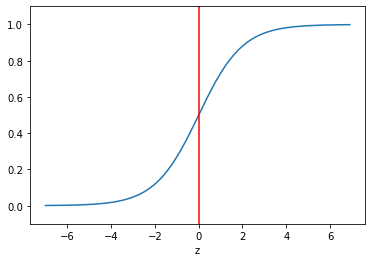

In [23]:
plt.plot(z, phi_z)
plt.axvline(0.0, color='r') #中心點位置
plt.ylim(-0.1, 1.1)
plt.xlabel('z')

In [24]:
from matplotlib.colors import ListedColormap

In [56]:
def polt_iris(X, y, classifier, resolusion = 0.01):
    markers = ('s', 'x', 'o') #標示點
    colors = ('red', 'blue', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y))]) # np.unique(去重複項再排序)
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolusion), np.arange(x2_min, x2_max, resolusion))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) # ravel() 二維轉一維
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap) # contourf 等高線圖 alpha 透明度
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for i, c in enumerate(np.unique(y)):
        plt.scatter(x = X[y == c, 0], 
                    y = X[y == c, 1], 
                    alpha = 0.6, color = cmap(i), edgecolor = 'black', marker = markers[i], label = c)

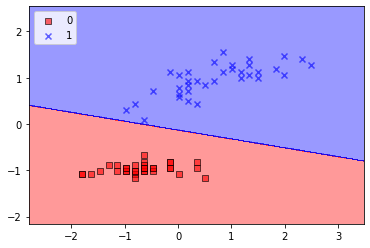

In [57]:
polt_iris(X_train_std, y_train['target'].values, lr)
plt.legend(loc = 'upper left')